#Airline Data Analysis using Pyspark

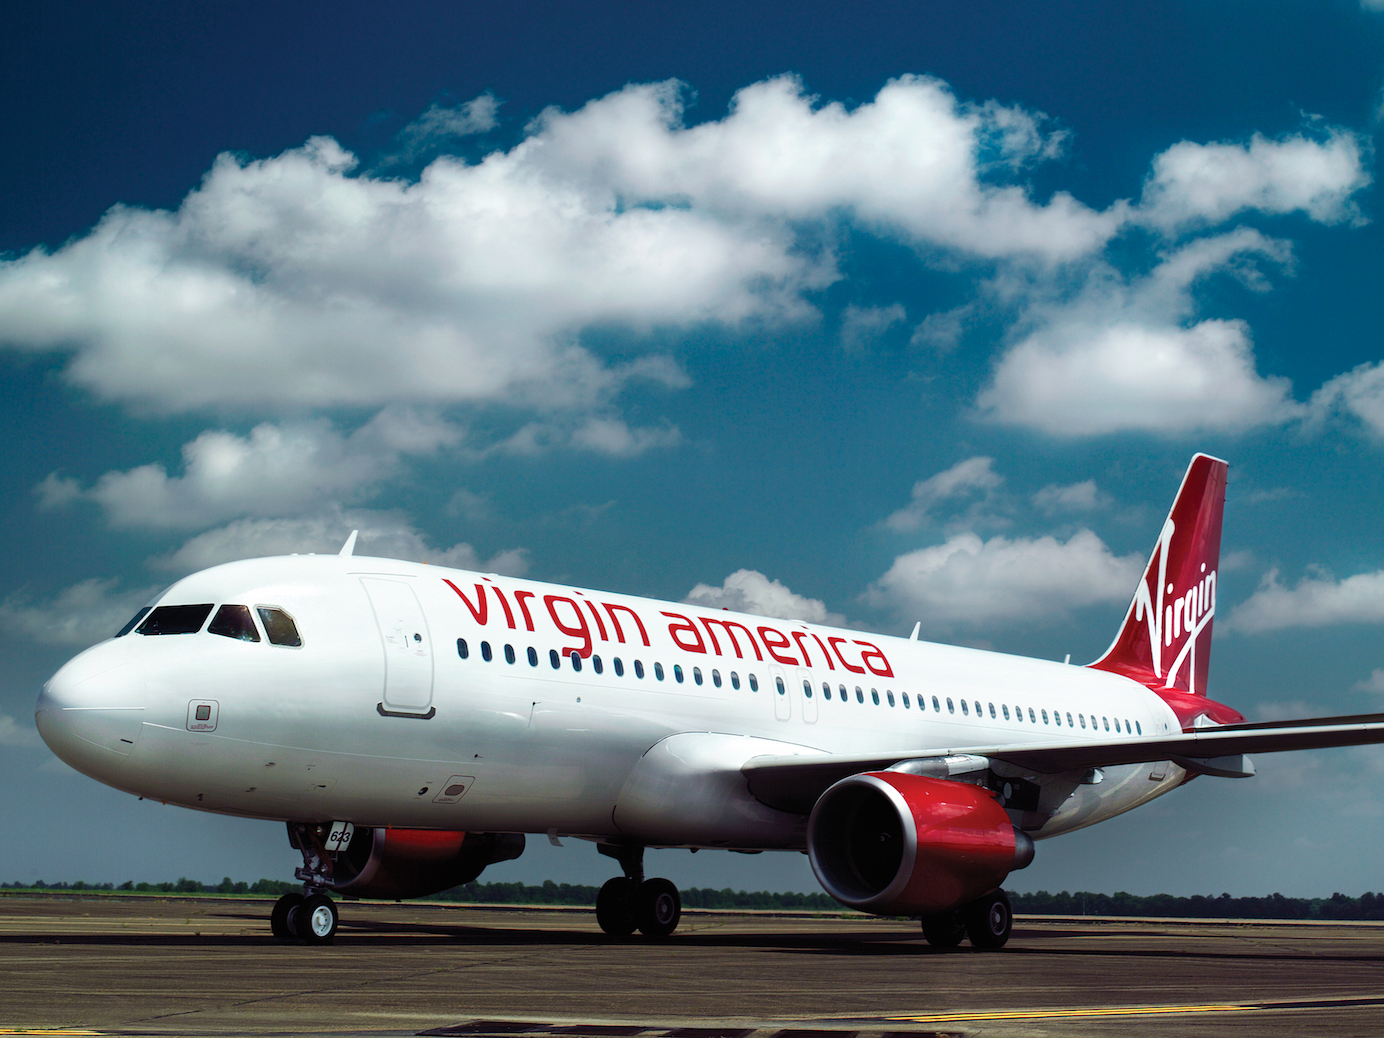



# Introduction:- 
We have the **Airline Data set** for the year of 1989 with 426 rows and 29 columns.



1. **Year**            : It consists of 1989 year airline details.
2. **Month**           : It consists of month number 1, means only January data.
3. **Day of the month** : Day of month conists of 1-31 days for the month number 1 for air travel.
4. **Day of Week** : Day of week consists of 1-7 days for a week .
5. **Deptime** : It is the departure time of flight.
6. **CRSDepTime** : Time taken for CRS departure.
7. **Arrtime** : Time taken for arrival.
8. **CRSArrTime** : Time taken for CRS Arrival time.
9. **UniqueCarrier** : Type of Unique Carrier.
10. **FlightNum**  : Number of flight.
11. **TailNum** : Tail number of flight.
12. **ActualElapsedTime** : Actual elapsed time of a flight trip.
13. **CRSElapsedTime** : Actual time for CRSElapsedTime.(Computerized Reservations Systems)
14. **AirTime** : It gives the total AirTime.
15. **ArrDelay** : Time taken for Air delay.
16. **DepDelay** : Time taken for departure delay.
17. **Origin** : Flight Origin place.
18. **Dest**   : Flight Destination place.
19. **Distance** : Distance covered by the flight trip.
20. **TaxiIn** : Taxi opted in for a trip.
21. **TaxiOut** : Taxi opted out for a trip.
22. **Cancelled** : Taxi cancelled.
23. **CancellationCode** : Shows the code for cancellation
24. **Diverted** : Diverted or not(1=yes,0=no)
25. **CarrierDelay**: Carrier is delayed or not(due to cleaning,baggage collection,maintenance)
26. **WeatherDelay** : Delay in weather(hazardous weather conditions)
27. **NASDelay** : NAS Delay in airtime(National Airspace System)
28. **SecurityDelay** : Delay due to security verification,terminal,screening
29. **LateAircraftDelay** : Delay due to late in Air craft


**We can able do data analysis with the 426 different internal flights in the US and understand the causes for delay, diversion, cancellation and many more.** 

## We can perform the Data analysis using Pyspark

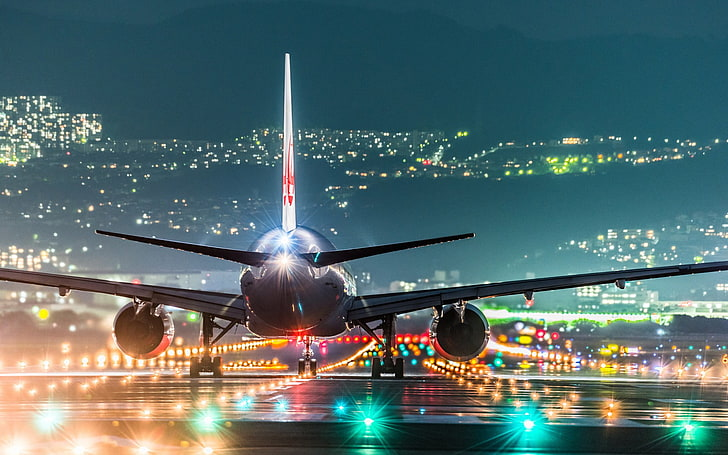

#DATA ANALYSIS using Pyspark

In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 42.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=755b8adef8c716cd1ddad589c8219af040e2597a569d37f7771a0fec6d00c724
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
#Initializing PySpark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext


# #Spark Config
conf = SparkConf().setAppName("sample_app")
sc = SparkContext(conf=conf)
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
sqlContext = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [ ]:
from pyspark.sql import functions as F
# initializing sql functions

In [ ]:
from pyspark.sql.functions import sum, col, desc, asc, count
# initializing sql aggregate functions

#Reading the Data Frame

In [ ]:
airline = spark.read.csv('/content/Airline_dataa.csv', header=True,inferSchema='True')
airline.show()


+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|1989|    1|        23|        1|   1419|      1230|   1742|      1552|           UA|      183

#DataFrame Shape

In [ ]:
row = airline.count()
# Total number of rows

column = len(airline.columns)
# Total number of columns

print(f'Numbe of rows in Dataframe: {row}') #printing

print(f'Numbe of columns in Dataframe: {column}') #printing

print(f'Dataframe Shape: {(row,column)}') #printing


Numbe of rows in Dataframe: 426
Numbe of columns in Dataframe: 29
Dataframe Shape: (426, 29)



#1.) Show a sample of 5 records from dataset.

In [ ]:
airline.limit(5).show()

#Printing the top 5 records from the datset

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|1989|    1|        23|        1|   1419|      1230|   1742|      1552|           UA|      183

###Using limit function we can only show the required rows.
###We can limit the rows to whatever limit we need. 

#2.) Read the data with data types.

In [ ]:
airline.printSchema()

#using the printSchema() we can get the each data type of a column

root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- DepTime: integer (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- ArrTime: integer (nullable = true)
 |-- CRSArrTime: integer (nullable = true)
 |-- UniqueCarrier: string (nullable = true)
 |-- FlightNum: integer (nullable = true)
 |-- TailNum: string (nullable = true)
 |-- ActualElapsedTime: integer (nullable = true)
 |-- CRSElapsedTime: integer (nullable = true)
 |-- AirTime: string (nullable = true)
 |-- ArrDelay: integer (nullable = true)
 |-- DepDelay: integer (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: integer (nullable = true)
 |-- TaxiIn: string (nullable = true)
 |-- TaxiOut: string (nullable = true)
 |-- Cancelled: integer (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Diverted: integer (nullable = true)
 |

###1. Spark schema is the structure of the DataFrame or Dataset




###2. It will return the tree-like structure and get column name along with datatype

It is not having any Null values.

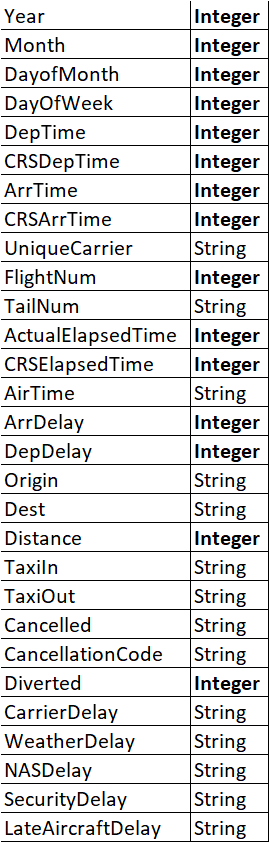

#3. Make a new column MonthStr, Which has months in form of 01, 02, 03, ..., 12.

In [ ]:
from pyspark.sql.functions import udf

In [ ]:
def MonthStr(Month): #Defining the function
  month_updated = "0"+str(Month) #converitng month to string to add '0'
  return month_updated

In [ ]:
res = udf(MonthStr)   #Assigning UDF
airline = airline.withColumn("MonthStr",res(col("Month")))   #creating new column with function .withColumn
airline.show()  #printing 

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+--------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|MonthStr|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+--------+
|1989|    1|        23|        1|   1419|      1230|   1742|      1

#4. Find the # of flights each airline made.

In [ ]:
from pyspark.sql.functions import countDistinct
#importing count disctinct function of SQL

In [ ]:
num_flights_distinct = airline.select(countDistinct("UniqueCarrier"))

num_flights_distinct.show()

#to get the distict count in the Unique carrier using SQL select fucntion

num_flights = airline.select(count("UniqueCarrier"))

num_flights.show()

#to get the overall count in the Unique carrier using SQL select fucntion

+-----------------------------+
|count(DISTINCT UniqueCarrier)|
+-----------------------------+
|                            1|
+-----------------------------+

+--------------------+
|count(UniqueCarrier)|
+--------------------+
|                 426|
+--------------------+



**Interpretation :-**
1. From the output total number of flights generated for airlines are  = **426**
2. Unique number of flights from **UniqueCarrier** is only **1** 
3. It means only **one** flight carrier is **"United Airlines"** out of **426** flights

In [ ]:
from pyspark.sql.functions import explode, col, udf, mean as _mean, stddev as _stddev


#  initializing sql aggregate functions for mean and udf

#5. Find the mean Arrival Delay per origination airport..

In [ ]:
delay_origin =airline.groupBy("Origin")\
.agg(_mean("ArrDelay").alias("Mean_arrival_delay"))\
.sort(desc("Mean_arrival_delay"))

# Grouping origin wise data
# Averaging(mean) of all ArrDelay and named as Mean Arrival Delay (to deal with ambiguity)
# Arranging dataframe in descending order

delay_origin.show()
#printing the origin

+------+-------------------+
|Origin| Mean_arrival_delay|
+------+-------------------+
|   DEN| 20.166666666666668|
|   OGG|  16.24137931034483|
|   HNL|  14.21774193548387|
|   IAD| 12.966666666666667|
|   SFO| 11.215384615384615|
|   EWR|               9.25|
|   PHL|  6.827586206896552|
|   LIH|0.16666666666666666|
+------+-------------------+



###**Interpretaion:-**
1. On an average **"DEN" and "OGG"** airports are having very high delays in arrivals with **20.16 and 16.24**

**By doing research we can know that Denver airport is the second largest in the world located in North America. It will be having more number of rotation of flights so we can expect more delays**



2. Less delays in airport of **LIH** (Lihui) with **0.16**


Airline company needs to put thier focus on reducing delays in flights in top 5 **origins**. 

***By doing research we can know that Lihui is smallest island with less population to visit by tourists. So it will defeinelty has less delay in the arrival of flights.***

#6. What is the average departure delay from each airport?

In [ ]:
Delay_Dpp =airline.groupBy("Origin")\
.agg(_mean("DepDelay").alias("Mean_depp_delay"))\
.sort(desc("Mean_depp_delay"))

# Grouping origin wise data
# Averaging(mean) of all DepDelay and named as Mean Depp Delay (to deal with ambiguity)
# Arranging dataframe in descending order

Delay_Dpp.show()
#printing the departure


+------+-------------------+
|Origin|    Mean_depp_delay|
+------+-------------------+
|   DEN|               27.6|
|   SFO| 19.646153846153847|
|   PHL| 16.137931034482758|
|   IAD|                8.9|
|   OGG|                6.0|
|   EWR|  4.958333333333333|
|   HNL|  3.217741935483871|
|   LIH|-3.7666666666666666|
+------+-------------------+



###**Interpretaion:-**
1. On an average **"DEN" and "SFO"** airports are having very high delays in **departures** with **20.16 and 16.24**

**By doing research we can know that Denver airport is the second largest in the world located in North America. It will be having more number of rotation of flights so we can expect more delays**


2. Less delays in **departure** airport of **LIH** with **-3.76** it means flight are reaching destination always late.


Airline company needs to put thier focus on reducing delays in flights in top 5 **departures**. 

**By doing research we can know that Lihui is smallest island with less population to visit by tourists. So it will defeinelty has less delay in the departure of flights.**